In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [13]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [14]:
diabetes['Outcome'].unique

<bound method Series.unique of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64>

In [15]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

C:\Users\antuk\AppData\Local\Temp\ipykernel_31696\3590426521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes, palette={'0': 'skyblue', '1': 'salmon'})


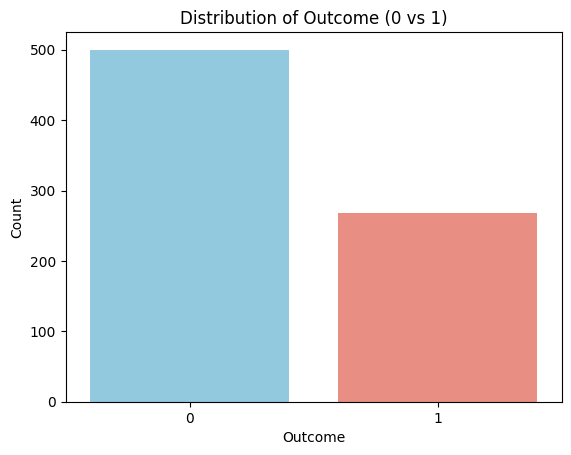

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot with different colors for '0' and '1'
sns.countplot(x='Outcome', data=diabetes, palette={'0': 'skyblue', '1': 'salmon'})

# Add labels and title
plt.title('Distribution of Outcome (0 vs 1)')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Show the plot
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Separate the features (X) and the target (y)
X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)


In [25]:
training_accuracy = []
test_accuracy = []

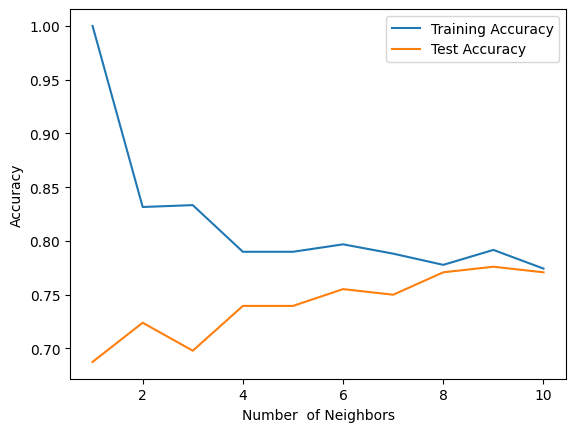

In [28]:
for n_neighbors in range(1,11):
    knn=KNeighborsClassifier(n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))

    test_accuracy.append(knn.score(X_test,y_test))

plt.plot(range(1,11),training_accuracy,label="Training Accuracy")
plt.plot(range(1,11),test_accuracy,label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number  of Neighbors")
plt.legend()
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


The accuracy on the training set with Decision Tree Classifier is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.
Now, I will do this again by doing set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [33]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


In [34]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


In [36]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Accuracy on training set: 0.773
Accuracy on test set: 0.740


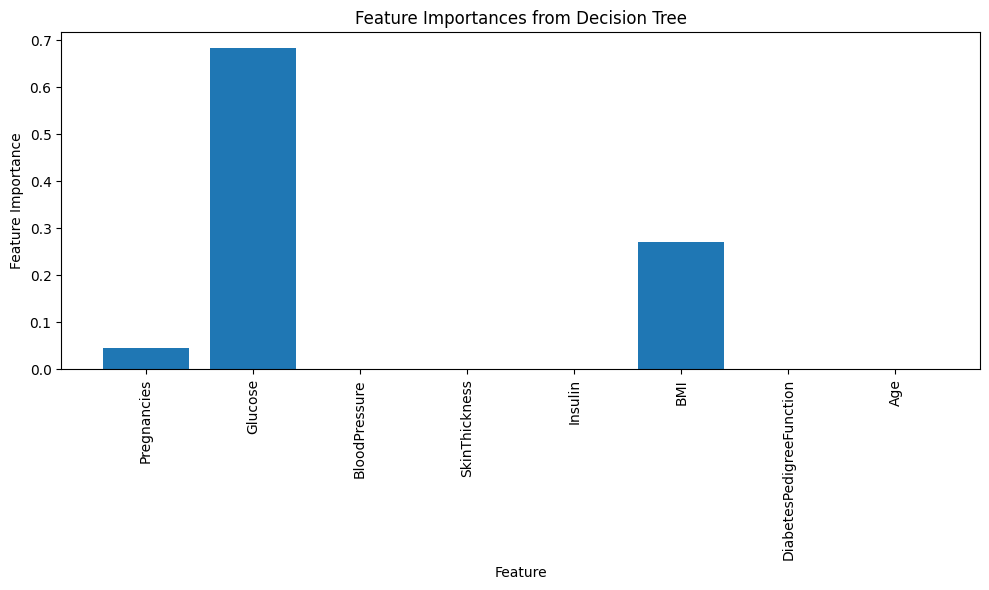

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Train the decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

# Print the accuracy
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Get feature importances
feature_importances = tree.feature_importances_

# Get the feature names from the X_train DataFrame
feature_names = X_train.columns

# Create a vertical bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(feature_importances)), feature_importances, align='center')
plt.xticks(np.arange(len(feature_importances)), feature_names, rotation=90)  # Correctly set x-axis ticks
plt.xlabel('Feature')  # Label for features on x-axis
plt.ylabel('Feature Importance')  # Label for feature importance on y-axis
plt.title('Feature Importances from Decision Tree')
plt.tight_layout()  # Adjust layout to ensure labels fit well
plt.show()


In [51]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.72


The accuracy of the Multilayer perceptrons (MLP) is not as good as the other models at all, this is likely due to scaling of the data. Deep learning algorithms also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. Now I will re-scale our data so that it fulfills these requirements to predict diabetes with a good accuracy

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.802


C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Accuracy on training set: 0.795
Accuracy on test set: 0.802


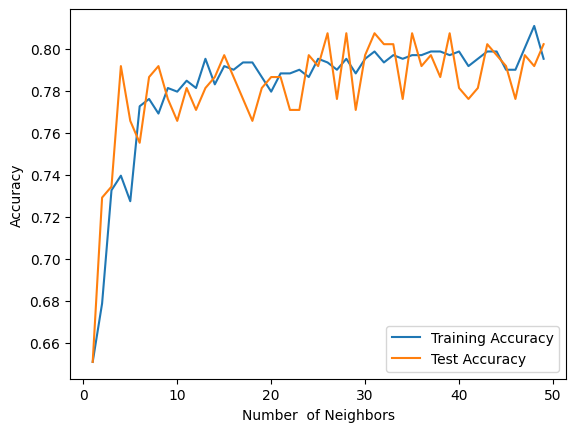

In [63]:
training_accuracy=[]
test_accuracy=[]
for random_state in range(1,50):
    mlp = MLPClassifier(random_state)
    mlp.fit(X_train_scaled,y_train)
    
    training_accuracy.append(mlp.score(X_train_scaled,y_train))
    test_accuracy.append(mlp.score(X_test_scaled,y_test))
    
plt.plot(range(1,50),training_accuracy,label="Training Accuracy")
plt.plot(range(1,50),test_accuracy,label="Test Accuracy")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
plt.ylabel("Accuracy")
plt.xlabel("Number  of Neighbors")
plt.legend()
plt.show()


In [53]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.797
